In [11]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
m = 500

# Hypothesis Function

In [13]:
def hypothesis(w, X):
    return (w[0] + w[1] * np.array(X[:, 0]))

# Cost Function

In [14]:
def cost_func(w, X, y):
    return ((0.5 / m) * np.sum(np.square(hypothesis(w, X) - np.array(y))))

## Defining the toy dataset

In [15]:
X, y = make_regression(n_samples = m, n_features = 1, n_informative = 1, noise = 7, bias = 50, random_state = 200)

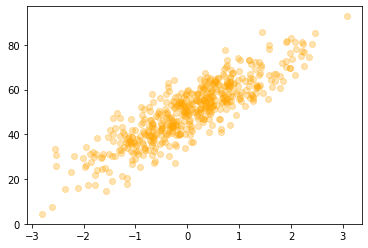

In [28]:
plt.scatter(X, y, alpha = 0.3, color = "orange")

## Gradient Descent Function

### Calculating Gradients

In [17]:
def grad(w, X, y):
    g = [0] * 2
    g[0] = (1/m) * (np.sum(hypothesis(w, X) - np.array(y)))
    g[1] = (1/m) * (np.sum((hypothesis(w, X) - np.array(y)) * np.array(X[:, 0])))
    return g

### Repetition of the updation of values until convergence

In [18]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost_func(w_prev, X, y))
    
    i = 0
    while True:
        w_prev = w_new
        w_0 = w_prev[0] - grad(w_prev, X, y)[0] * lr
        w_1 = w_prev[1] - grad(w_prev, X, y)[1] * lr
        w_new = [w_0, w_1]
        print(w_new)
        print(cost_func(w_new, X, y))
        if (w_new[0] - w_prev[0]) ** 2 + (w_new[1] - w_prev[1]) ** 2 <= pow(10,-6):
            print(i)
            return w_new
        if(i > 750):
            print(i)
            return w_new
        i += 1

### Setting up the initial parameters and training the model using gradient descent optimiser

In [19]:
w = [0, 0]
w = descent(w, w, 0.3)

[0, 0]
1361.3173988352899
[15.097113520640693, 4.003112891724483]
671.7257155001773
[25.630989368066647, 6.695053222314984]
337.54979135652275
[32.981769083025156, 8.502028815095725]
175.55448836560842
[38.11192076265764, 9.712584005345311]
96.99858364936773
[41.692713886605546, 10.521824966617356]
58.89116870504706
[44.192374927595864, 11.061502998008908]
40.39850207627525
[45.93753999107307, 11.420459911783466]
31.421027241261722
[47.15609748307491, 11.658510134863425]
27.061105395052476
[48.00705971231409, 11.815856922313234]
24.942849894453126
[48.60139279232941, 11.91947245098679]
23.91327389884567
[49.01654321922331, 11.987415719590109]
23.412635445661174
[49.30656969070282, 12.031751145728455]
23.169089432735944
[49.5092105150793, 12.06051866698376]
23.050557833976264
[49.65081401373658, 12.079061646944384]
22.99284282140289
[49.749778490062916, 12.090920502214459]
22.964727039518046
[49.8189525946497, 12.098433037803986]
22.951023796151983
[49.86731046650862, 12.103136988592077

In [20]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y) 
def formula(x):
    return w[0]+w[1]*x

<function matplotlib.pyplot.show(close=None, block=None)>

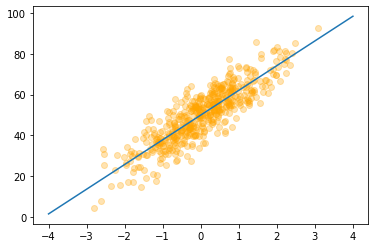

In [21]:
plt.scatter(X, y, color = "orange", alpha = 0.3)
graph(formula, range(-4, 5))
plt.show

## R^2 Test:

In [22]:
def r2_test(y_pred, y):
    ssr = np.sum((y - y_pred) ** 2)
    sst = np.sum((y - y.mean()) ** 2)
    return (1 - (ssr / sst))

In [23]:
print(r2_test(hypothesis(w, X), y))

0.758749341534726


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create the linear regression object
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(X, y)

# Predict
y_predicted = regression_model.predict(X)

r2 = r2_score(y, y_predicted)
print(r2)

0.758749367608581
